In [1]:
#Import neccessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv('./post natal data.csv')

In [3]:
# Display the first few rows of the DataFrame
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [4]:
df.drop(columns=['Timestamp'],inplace=True) # Features (excluding 'Timestamp')

In [5]:
df.describe()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,5,3,3,3,3,3,2,3,3,3
top,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,364,536,555,640,583,841,980,624,557,709


In [6]:
df.fillna('Sometimes', inplace=True)

In [7]:
import pandas as pd

# Assuming df is your DataFrame
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Unique values for column '{column}':")
    print(values)
    print()

Unique values for column 'Age':
['35-40' '40-45' '30-35' '45-50' '25-30']

Unique values for column 'Feeling sad or Tearful':
['Yes' 'No' 'Sometimes']

Unique values for column 'Irritable towards baby & partner':
['Yes' 'No' 'Sometimes']

Unique values for column 'Trouble sleeping at night':
['Two or more days a week' 'No' 'Yes']

Unique values for column 'Problems concentrating or making decision':
['Yes' 'No' 'Often' 'Sometimes']

Unique values for column 'Overeating or loss of appetite':
['Yes' 'No' 'Not at all']

Unique values for column 'Feeling anxious':
['Yes' 'No']

Unique values for column 'Feeling of guilt':
['No' 'Yes' 'Maybe' 'Sometimes']

Unique values for column 'Problems of bonding with baby':
['Yes' 'Sometimes' 'No']

Unique values for column 'Suicide attempt':
['Yes' 'No' 'Not interested to say']



In [8]:
df.isnull() 

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1498,False,False,False,False,False,False,False,False,False,False
1499,False,False,False,False,False,False,False,False,False,False
1500,False,False,False,False,False,False,False,False,False,False
1501,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().count()

Age                                          1503
Feeling sad or Tearful                       1503
Irritable towards baby & partner             1503
Trouble sleeping at night                    1503
Problems concentrating or making decision    1503
Overeating or loss of appetite               1503
Feeling anxious                              1503
Feeling of guilt                             1503
Problems of bonding with baby                1503
Suicide attempt                              1503
dtype: int64

In [10]:
column_names = list(df.columns)
print(column_names)

['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt']


In [11]:
df.dtypes

Age                                          object
Feeling sad or Tearful                       object
Irritable towards baby & partner             object
Trouble sleeping at night                    object
Problems concentrating or making decision    object
Overeating or loss of appetite               object
Feeling anxious                              object
Feeling of guilt                             object
Problems of bonding with baby                object
Suicide attempt                              object
dtype: object

In [12]:
# Get non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:", non_numeric_columns)

Non-Numeric Columns: Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')


In [13]:

from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder for each column
label_encoders = {}
label_mappings = {}

for column in non_numeric_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    label_encoders[column] = encoder
    label_mappings[column] = {label: encoded_label for label, encoded_label in zip(encoder.classes_, encoder.transform(encoder.classes_))}

# Now, the non-numeric columns are converted to numeric using label encoding
df.head()

# Access label mappings for each column
for column, mapping in label_mappings.items():
    print(f"Label Mapping for column '{column}':")
    for label, encoded_label in mapping.items():
        print(f"{label}: {encoded_label}")


Label Mapping for column 'Age':
25-30: 0
30-35: 1
35-40: 2
40-45: 3
45-50: 4
Label Mapping for column 'Feeling sad or Tearful':
No: 0
Sometimes: 1
Yes: 2
Label Mapping for column 'Irritable towards baby & partner':
No: 0
Sometimes: 1
Yes: 2
Label Mapping for column 'Trouble sleeping at night':
No: 0
Two or more days a week: 1
Yes: 2
Label Mapping for column 'Problems concentrating or making decision':
No: 0
Often: 1
Sometimes: 2
Yes: 3
Label Mapping for column 'Overeating or loss of appetite':
No: 0
Not at all: 1
Yes: 2
Label Mapping for column 'Feeling anxious':
No: 0
Yes: 1
Label Mapping for column 'Feeling of guilt':
Maybe: 0
No: 1
Sometimes: 2
Yes: 3
Label Mapping for column 'Problems of bonding with baby':
No: 0
Sometimes: 1
Yes: 2
Label Mapping for column 'Suicide attempt':
No: 0
Not interested to say: 1
Yes: 2


In [14]:
df.corr()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
Age,1.000000,-0.007180,0.026814,-0.078397,0.028202,-0.158305,0.056179,-0.088085,-0.001325,-0.074603
Feeling sad or Tearful,-0.007180,1.000000,-0.221088,-0.117364,0.046112,0.360815,-0.039628,-0.172762,0.166051,-0.225143
Irritable towards baby & partner,0.026814,-0.221088,1.000000,-0.042000,0.122070,-0.024577,0.032535,0.023319,-0.073502,0.283240
Trouble sleeping at night,-0.078397,-0.117364,-0.042000,1.000000,-0.093059,0.025543,-0.120967,0.116825,-0.149777,0.156737
Problems concentrating or making decision,0.028202,0.046112,0.122070,-0.093059,1.000000,-0.008491,0.113570,-0.017289,0.277102,0.157236
Overeating or loss of appetite,-0.158305,0.360815,-0.024577,0.025543,-0.008491,1.000000,-0.151471,0.149767,0.084874,-0.018513
Feeling anxious,0.056179,-0.039628,0.032535,-0.120967,0.113570,-0.151471,1.000000,-0.365996,0.226769,-0.040325
Feeling of guilt,-0.088085,-0.172762,0.023319,0.116825,-0.017289,0.149767,-0.365996,1.000000,-0.167863,0.249983
Problems of bonding with baby,-0.001325,0.166051,-0.073502,-0.149777,0.277102,0.084874,0.226769,-0.167863,1.000000,-0.037258
Suicide attempt,-0.074603,-0.225143,0.283240,0.156737,0.157236,-0.018513,-0.040325,0.249983,-0.037258,1.000000


In [15]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Feeling anxious'].abs().sort_values(ascending=False)

In [16]:
# Define features and target variable
X = df.drop(columns=['Feeling anxious'])  
y = df['Feeling anxious']  # Target variable

In [17]:
X.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2,2,2,1,3,2,1,2,2
1,3,2,0,0,3,2,3,2,0
2,2,2,0,2,3,2,1,1,0
3,2,2,2,2,3,0,0,0,0
4,3,2,0,1,3,0,1,2,0


In [18]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Feeling anxious, dtype: int32

In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# SVM optimization using GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_classifier = SVC(probability=True)
grid_search_svm = GridSearchCV(svm_classifier, svm_param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search_svm.fit(X_train, y_train)

# Print the best parameters found for SVM
print("Best Parameters for SVM:", grid_search_svm.best_params_)

Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Train Naive Bayes model
naive_bayes_classifier = GaussianNB()
#naive_bayes_classifier.fit(X_train, y_train)

# Train Multilayer Perceptron (MLP) model
mlp_classifier = MLPClassifier(max_iter=900)  # Example with max_iter set to 500

#mlp_classifier.fit(X_train, y_train)



In [77]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50,max_depth=10)

In [78]:
# Create a list of tuples containing classifier names and their corresponding instances
classifiers = [
    ('SVM', grid_search_svm.best_estimator_),  # Use the best SVM model from GridSearchCV
    ('Random Forest', rf_classifier),
    ('Naive Bayes', naive_bayes_classifier),
    ('Multilayer Perceptron', mlp_classifier)
]

In [79]:
grid_search_svm.best_estimator_.fit(X_train, y_train)

SVC(C=100, probability=True)

In [80]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [81]:
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [82]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=900)

In [83]:
# Train each classifier and evaluate its performance
for clf_name, clf in classifiers:
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name} Accuracy: {accuracy}')

SVM Accuracy: 0.973421926910299
Random Forest Accuracy: 0.973421926910299
Naive Bayes Accuracy: 0.7940199335548173
Multilayer Perceptron Accuracy: 0.8970099667774086


In [84]:
# Create a VotingClassifier with SVM and Random Forest
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

In [85]:
# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC(C=100, probability=True)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50)),
                             ('Naive Bayes', GaussianNB()),
                             ('Multilayer Perceptron',
                              MLPClassifier(max_iter=900))],
                 voting='soft')

In [86]:
# Predictions using the ensemble model
ensemble_pred = voting_clf.predict(X_test)

In [87]:
# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

In [88]:
print(f'Ensemble Accuracy: {ensemble_accuracy}')

Ensemble Accuracy: 0.9435215946843853


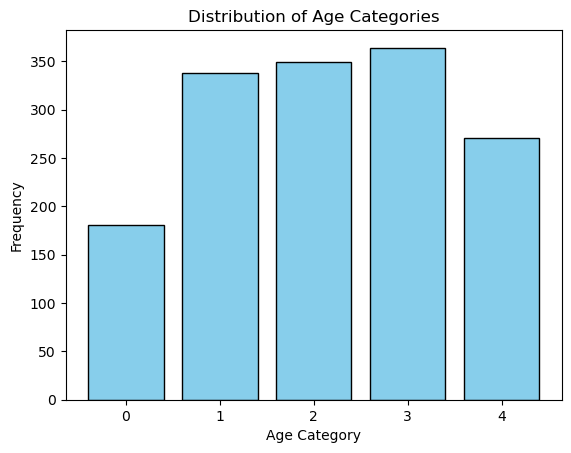

In [69]:
import matplotlib.pyplot as plt

# Plot bar plot for the 'Age' feature
plt.bar(df['Age'].value_counts().index, df['Age'].value_counts().values, color='skyblue', edgecolor='black')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.title('Distribution of Age Categories')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


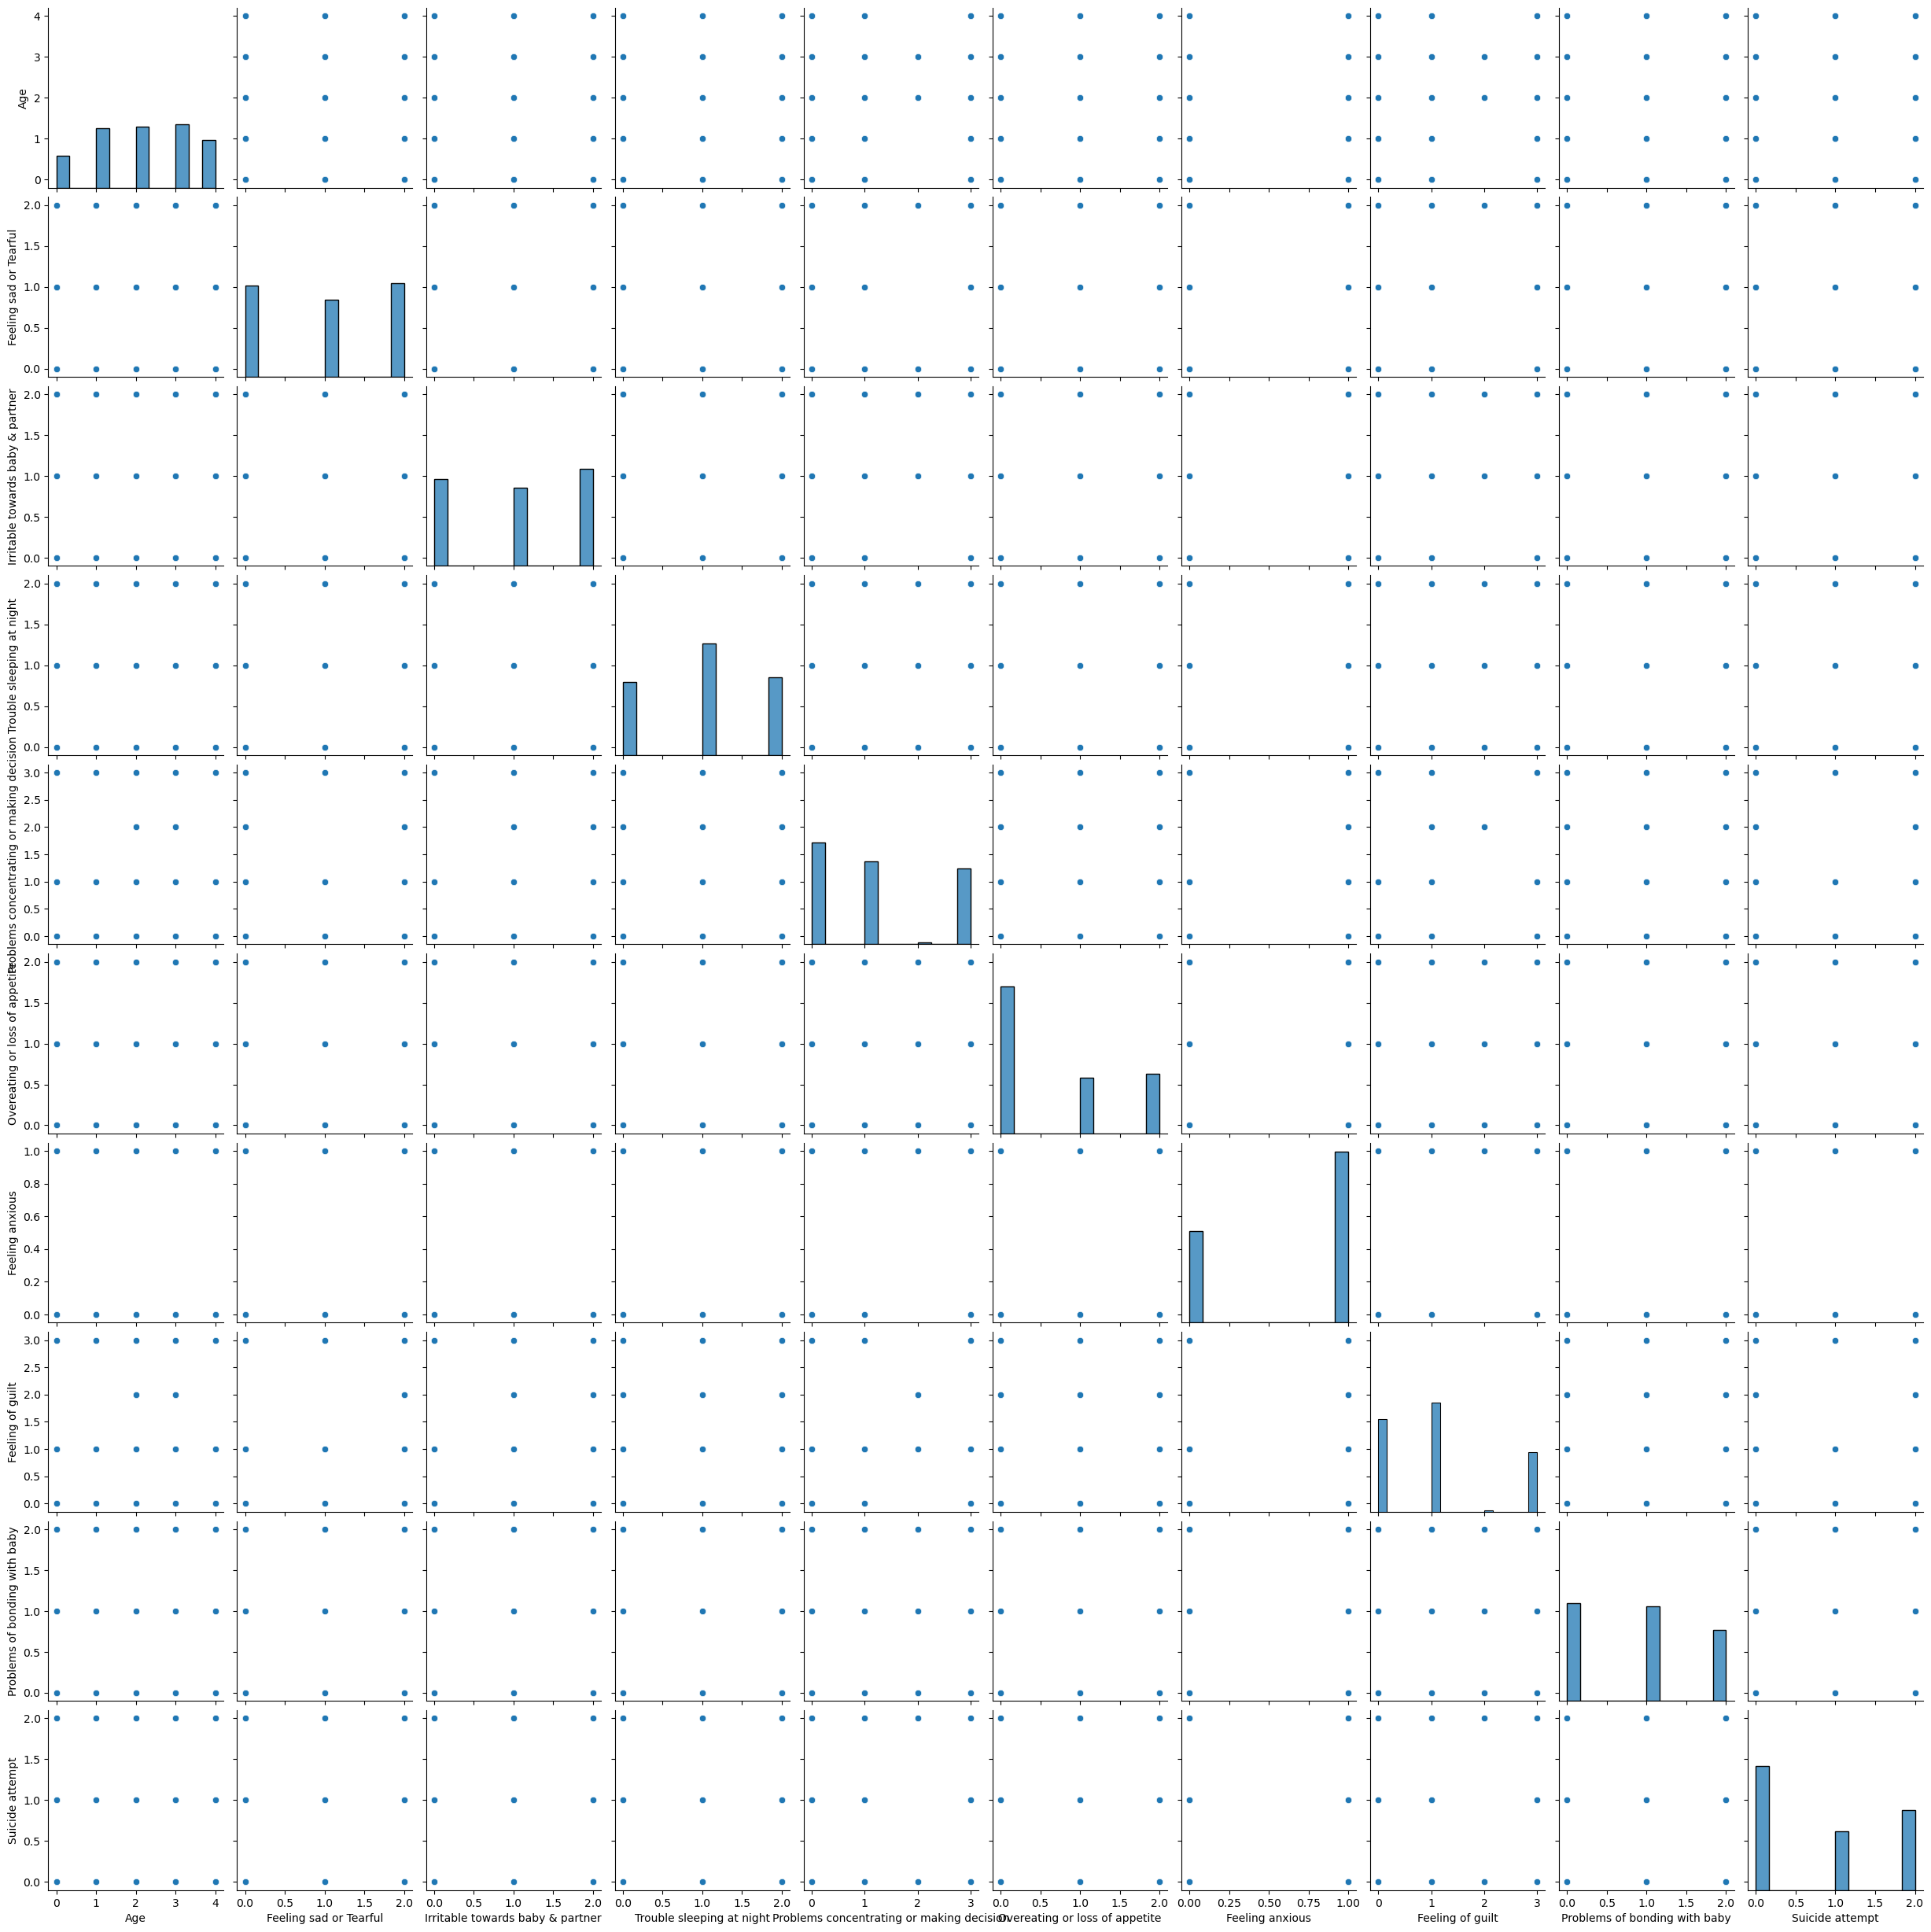

In [89]:
import seaborn as sns

# Create a pairplot
sns.pairplot(df)
plt.show()


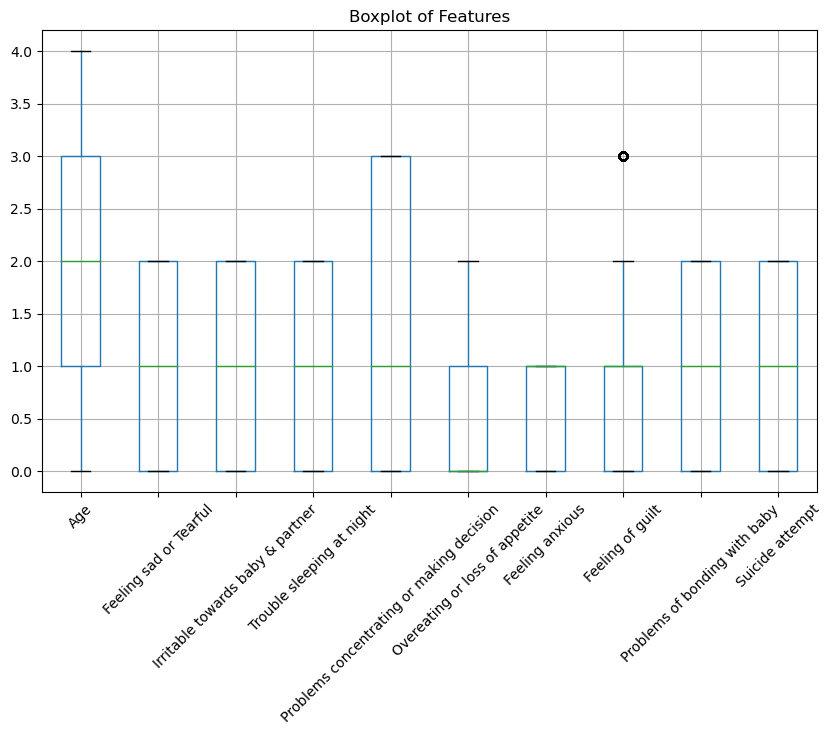

In [71]:
# Create boxplots for each feature
df.boxplot(figsize=(10,6))
plt.xticks(rotation=45)
plt.title('Boxplot of Features')
plt.show()


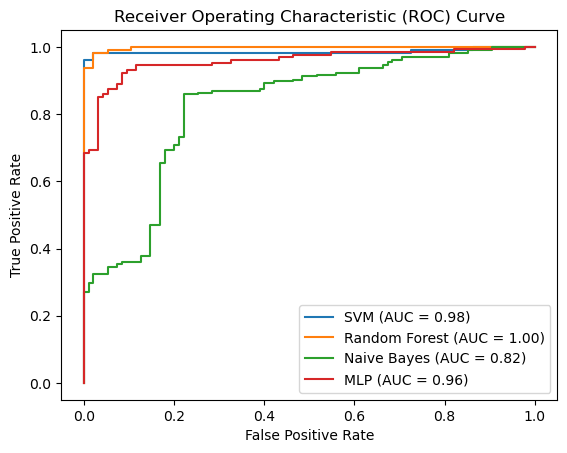

In [90]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Create ROC curve displays for each classifier
svc_disp = RocCurveDisplay.from_estimator(grid_search_svm.best_estimator_, X_test, y_test, name='SVM')
rfc_disp = RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test, ax=svc_disp.ax_, name='Random Forest')
nb_disp = RocCurveDisplay.from_estimator(naive_bayes_classifier, X_test, y_test, ax=svc_disp.ax_, name='Naive Bayes')
mlp_disp = RocCurveDisplay.from_estimator(mlp_classifier, X_test, y_test, ax=svc_disp.ax_, name='MLP')

# Plot ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Train and save the model
import joblib

# Train your model
model = voting_clf

# Save the model to disk
joblib.dump(model, 'depression_model.pkl')